In this example, we will load the image of a strong lens from a .fits file and plot it using the function _autolens.data.plotters.array_plotters.plot_array_. We will customize the appearance of this figure to highlight the features of the image. For more generical plotting tools (e.g. changing the figure size, axis units, outputting the image to the hard-disk, etc.) checkout the example in '_workspace/plotting/examples/arrays/array.py_'.

We will use the image of slacs1430+4105.

We have included the .fits data required for this example in the directory _'workspace/output/data/example/slacs1430+4105/'_.

In [1]:
from autolens.data.array import scaled_array
from autolens.data.array.plotters import array_plotters

First, lets setup the path to the .fits file of the image.

In [2]:
# If you are using Docker, the path to the workspace is as follows (e.g. comment out this line)!
# path = '/home/user/workspace/'

# If you arn't using docker, you need to change the path below to the workspace directory and uncomment it
# path = '/path/to/workspace/'

lens_name = 'slacs1430+4105'
image_path = path+'/data/example/'+lens_name+'/image.fits'

Now, lets load this image as a scaled array. A scaled array is an ordinary NumPy array, but it also includes a pixel scale which allows us to convert the axes of the image to arc-second coordinates.

In [3]:
image = scaled_array.ScaledSquarePixelArray.from_fits_with_pixel_scale(file_path=image_path, hdu=0, pixel_scale=0.03)

We can now use an array plotter to plot the image. Lets first plot it using the default PyAutoLens settings.

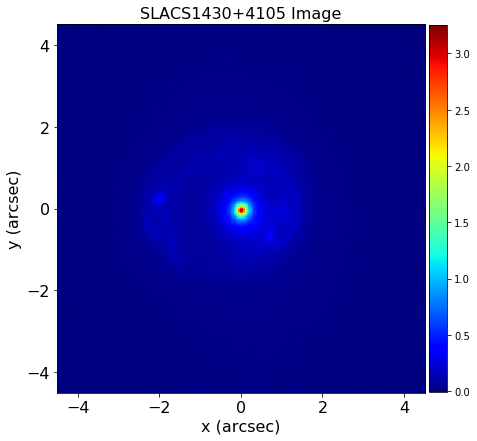

In [4]:
array_plotters.plot_array(array=image, title='SLACS1430+4105 Image')

For a lens like SLACS1430+4105, the lens galaxy's light outshines the background source, making it appear faint. we can use a symmetric logarithmic colorbar normalization to better reveal the source galaxy (due to negative valuesin the image, we cannot use a regular logirithmic colorbar normalization).


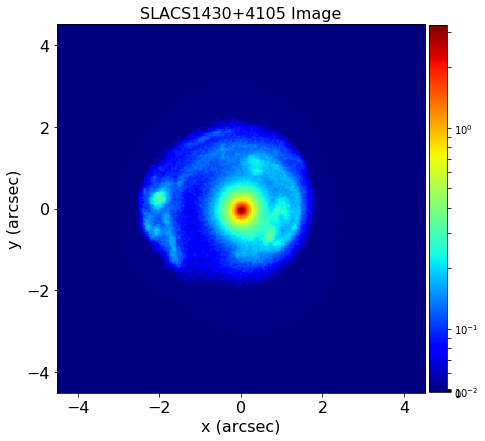

In [5]:
array_plotters.plot_array(array=image, title='SLACS1430+4105 Image',
                          norm='symmetric_log', linthresh=0.05, linscale=0.02)

Alternatively, we can use the default linear colorbar normalization and customize the limits over which the colormap spans its dynamic range.

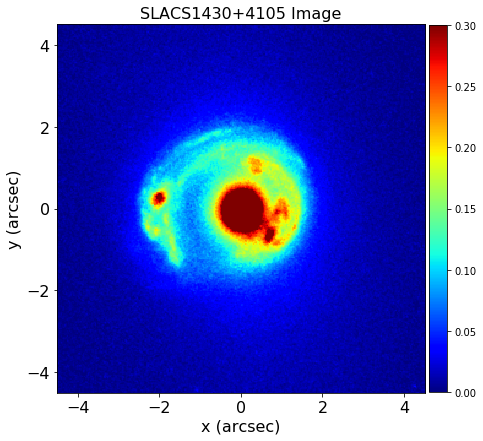

In [7]:
array_plotters.plot_array(array=image, title='SLACS1430+4105 Image',
                          norm='linear', norm_min=0.0, norm_max=0.3)

We can also load the full set of ccd data (image, noise-map, PSF) and use the ccd_plotters to make the figures above.

In [1]:
from autolens.data import ccd
from autolens.data.plotters import ccd_plotters

psf_path = path+'/data/example/'+lens_name+'/psf.fits'
noise_map_path = path+'/data/example/'+lens_name+'/noise_map.fits'

ccd_data = ccd.load_ccd_data_from_fits(image_path=image_path, psf_path=psf_path, noise_map_path=noise_map_path,
                                       pixel_scale=0.03)

NameError: name 'path' is not defined

These plotters can be customized using the exact same functions as above.

In [ ]:
ccd_plotters.plot_noise_map(ccd_data=ccd_data, title='SLACS1430+4105 Noise-Map',
                            norm='log')

Of course, as we've seen in many other examples, a sub-plot of the ccd data can be plotted. This can also take the customization inputs above, but it should be noted that the options are applied to all images, and thus will most likely degrade a number of the sub-plot images.

In [ ]:
ccd_plotters.plot_ccd_subplot(ccd_data=ccd_data, norm='symmetric_log', linthresh=0.05, linscale=0.02)